[![General Assembly Logo](https://camo.githubusercontent.com/1a91b05b8f4d44b5bbfb83abac2b0996d8e26c92/687474703a2f2f692e696d6775722e636f6d2f6b6538555354712e706e67)](https://generalassemb.ly/education/web-development-immersive)
![Misk Logo](https://i.ibb.co/KmXhJbm/Webp-net-resizeimage-1.png)

*Instructor: Husain Amer*

___

# Basic EDA Lab

Let's explore one of the most famous and benchmark dataset ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic/data) from kaggle. This dataset is considered the first step to wards classification in machine learning (we will learn this in the ML section). <br>

Follow this link at [kaggle](https://www.kaggle.com/c/titanic) for detailed description on titanic dataset.<br>

**Data Dictionary**
* PassengerId
* Survived -- 0 = No, 1 = Yes
* Pclass -- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Name -- Passenger name 
* Sex -- male / female 	
* Age -- age in years	
* SibSp -- no. of siblings / spouses aboard the Titanic	
* Parch -- no. of parents / children aboard the Titanic	
* Ticket -- Ticket number	
* Fare -- Passenger fare	
* Cabin -- Cabin number	
* Embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

First thing first, let's import some libraries. At this stage, I am sure these libraries are not new to you!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Let's read`"titanic.csv"` dataset

## Please note, don't run the cell right above the given output, you will lose the existing output. The plots are provided for your convenience. 

**`titanic.csv` file is give, read that file into `titanic` dataframe.**

In [2]:
titanic = pd.read_csv('./datasets/titanic.csv')

**How to get top 10 rows of your dataframe?**

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**How many rows/datapoints are their in the datafrmae**

In [4]:
titanic.shape

(891, 12)

**Rename the columns to something that is more readable, your choice**. Use a new dataframe for this purpose, we are going to use titanic and same column names for the exercises in the next cells. 

In [5]:
titanic_1=titanic.copy()
columns_dict = {
    titanic_1.columns[2]:'Ticket class',
    titanic_1.columns[6]:'Siblings per spouses',
    titanic_1.columns[7]:'Parents per children'
}
titanic_1 = titanic_1.rename(columns=columns_dict, inplace=False)
titanic_1.columns

Index(['PassengerId', 'Survived', 'Ticket class', 'Name', 'Sex', 'Age',
       'Siblings per spouses', 'Parents per children', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**Missing Data**<br>
**If there us any missing data, what is the % of that missing data in the respective column.** 

In [6]:
# code here please 
null_titanic = pd.DataFrame(titanic.isnull().sum()/len(titanic) * 100)
null_titanic = round(null_titanic,1)
null_titanic[0].sort_values(ascending = False)[:5]

Cabin       77.1
Age         19.9
Embarked     0.2
Fare         0.0
Ticket       0.0
Name: 0, dtype: float64

In [4]:
# NO CODE HERE PLEASE

Cabin       77.1
Age         19.9
Embarked     0.2
Fare         0.0
Ticket       0.0
dtype: float64

**`isnull()` return `True` for all the places where the data is missing. Our dataset is large, we better think about graphical visualization using seaborn's heatmap method to visualization missing data! <br>
Re-create the heatmap given below**

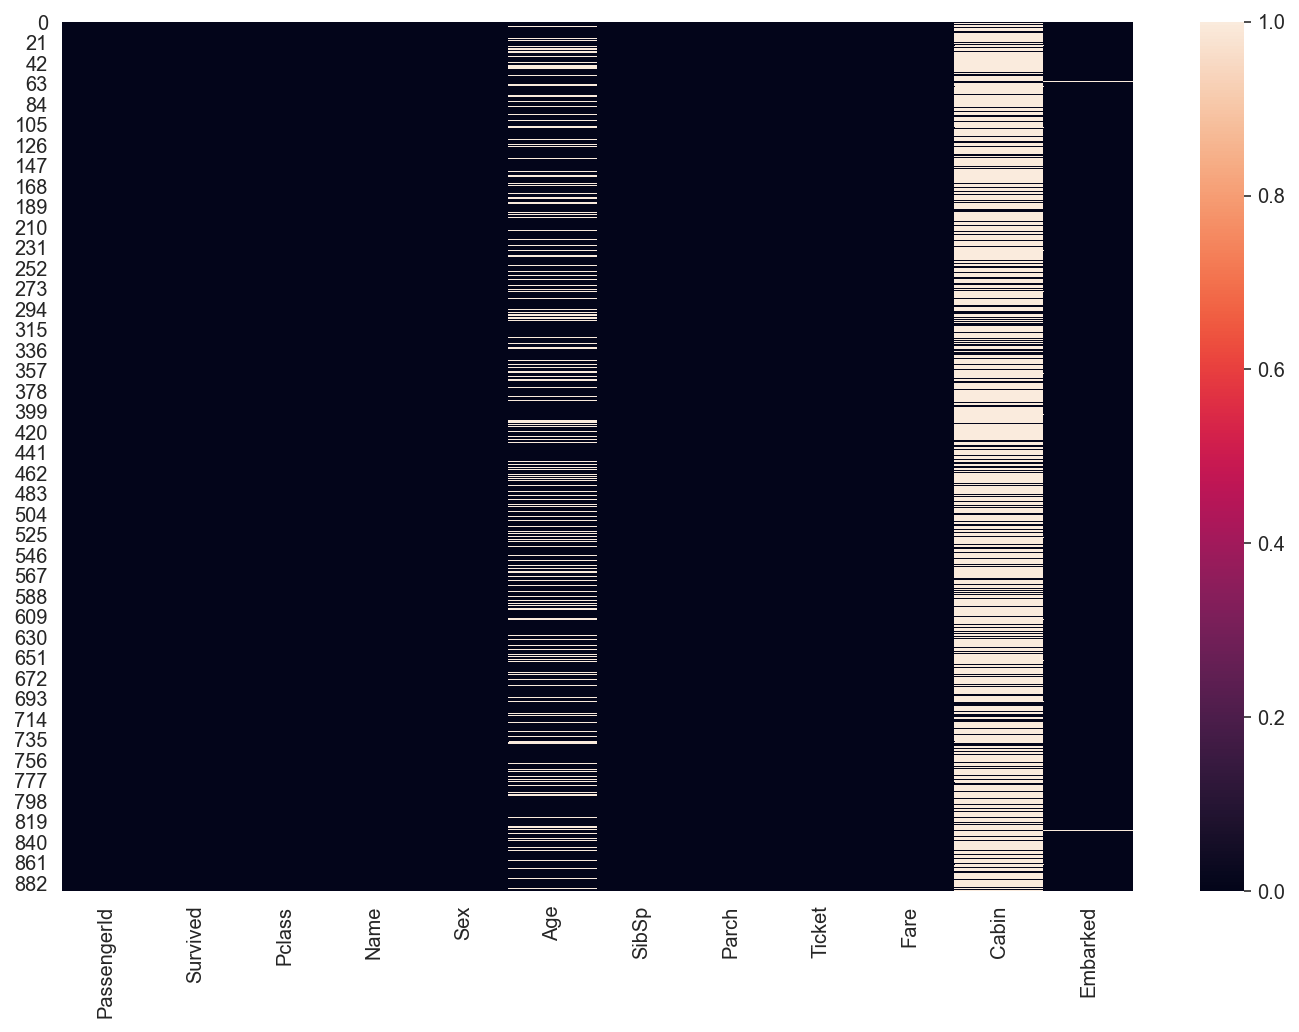

In [7]:
# Code here please.
titanic_pd = titanic.isnull()
plt.subplots(figsize=(12,8))
sns.heatmap(titanic_pd, annot=False);

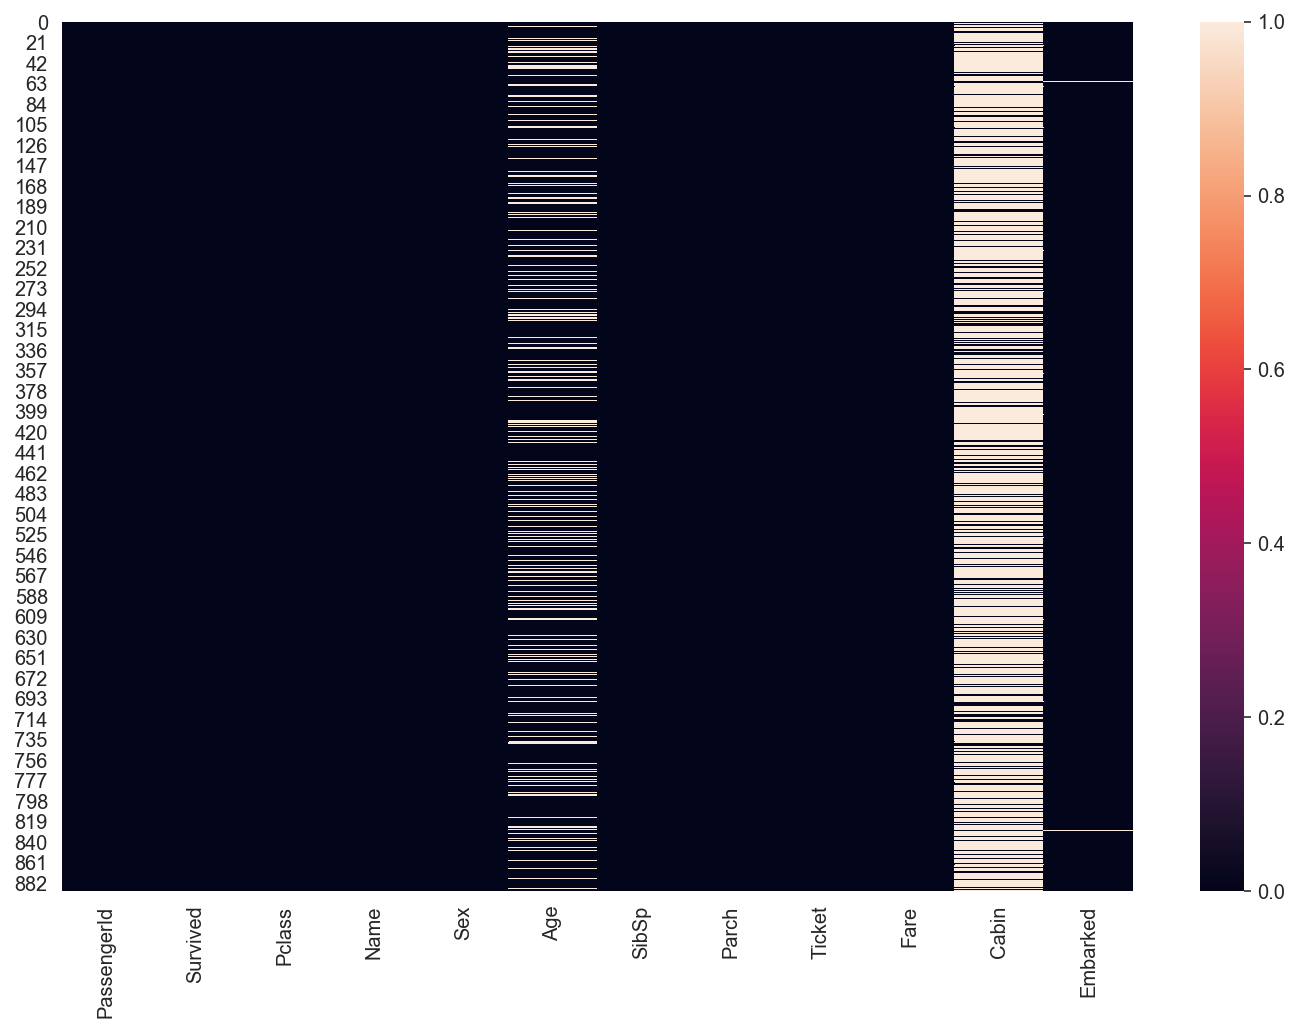

In [6]:
# NO CODE HERE PLEASE

The above plot might be ok, but visualization of our heatmap can be improved. `yticklabels` are overlapping and the color bar is also not useful in this case.<br>
We can set `yticklabels` and `cbar` to `False` and also use `cmap = 'viridis'` for cleaner map (you can use color of your choice)!<br>
**You may want to create a heatmap given below**

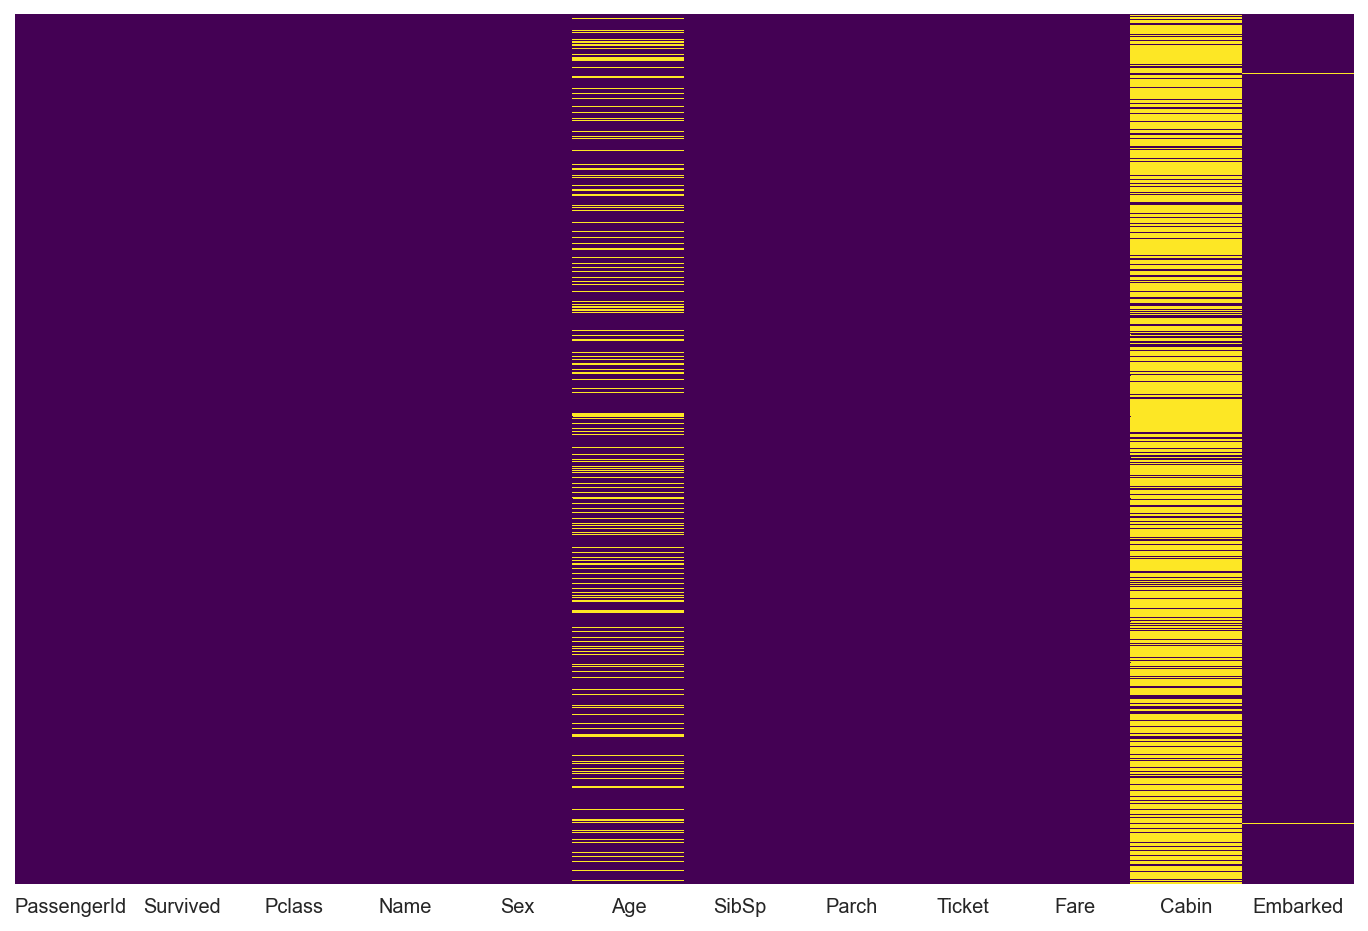

In [8]:
# code here please
plt.subplots(figsize=(12,8))
sns.heatmap(titanic_pd, annot=False,cbar=False,yticklabels=False,cmap='viridis');

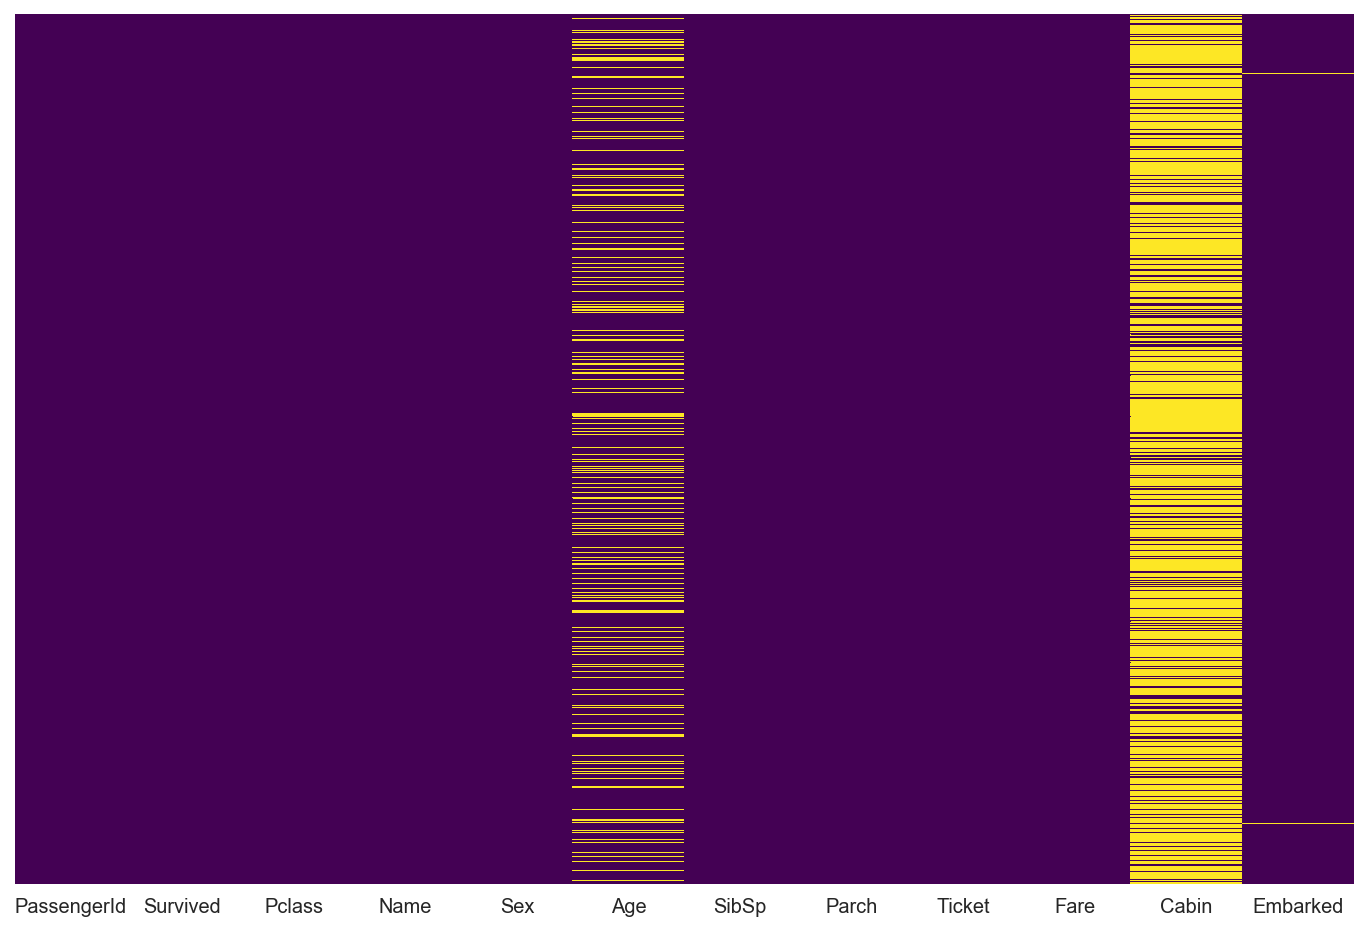

In [8]:
# NO CODE HERE PLEASE

The map looks much better now.<br>
Notice, yellow are `True` which represent the missing data!<br><br>
**Well, we want to know more about the dataset<br>**
Can use get a `countplot()` to see how many people survived and how many died?

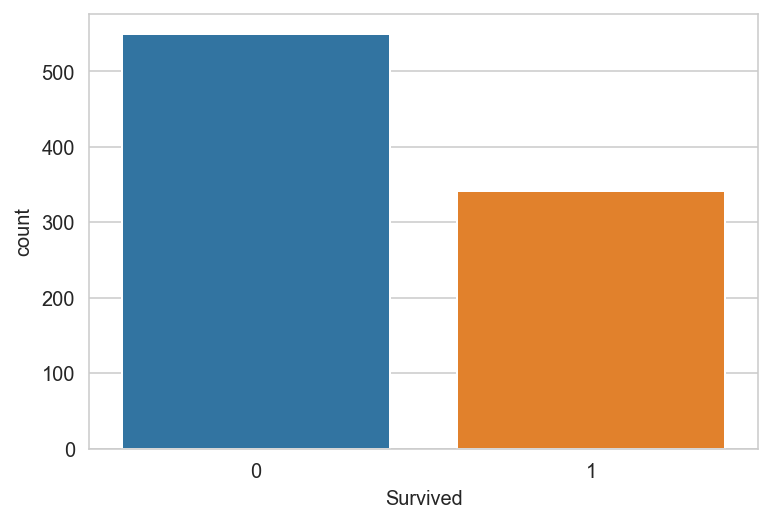

In [9]:
# code here please
sns.countplot(x ='Survived', data = titanic)
plt.show()

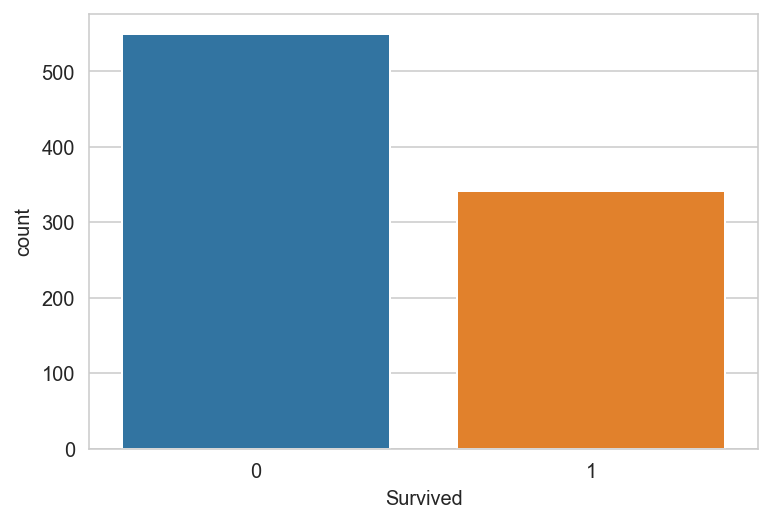

In [10]:
# NO CODE HERE PLEASE

It's sad that not many passengers survived! <br><br>
**Let's dig into little deeper, which gender survived the most. You may want to use `hue` parameter here.**

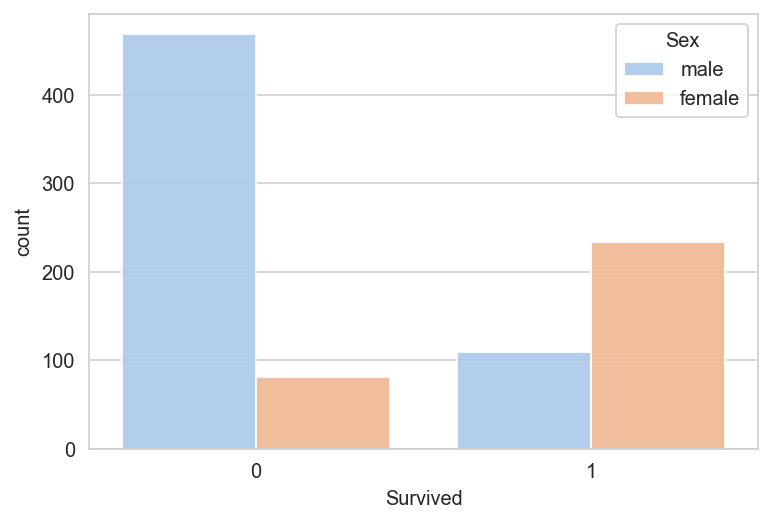

In [10]:
# code here please
sns.countplot(x ='Survived',hue='Sex', data = titanic,palette='pastel',alpha=0.9)
plt.show()

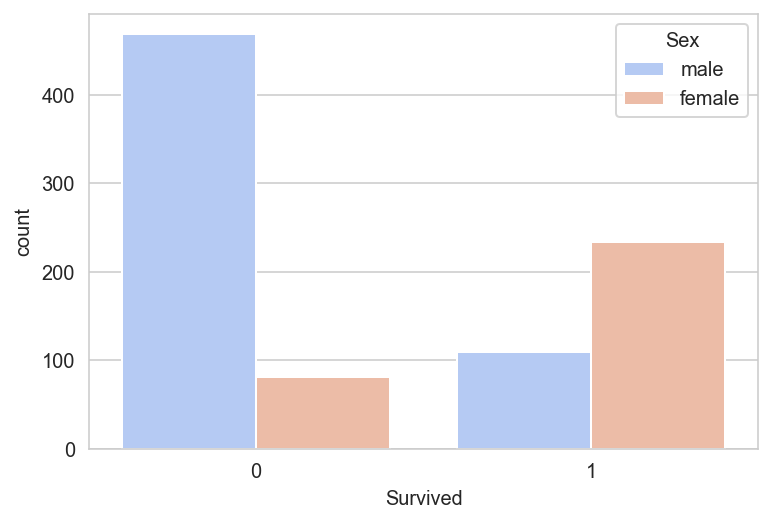

In [12]:
# NO CODE HERE PLEASE

**What was the age distribution of the passengers on titanic?** Try without dropping missing data in age and after dropping missing data. Compare your distplots, do you find any difference?

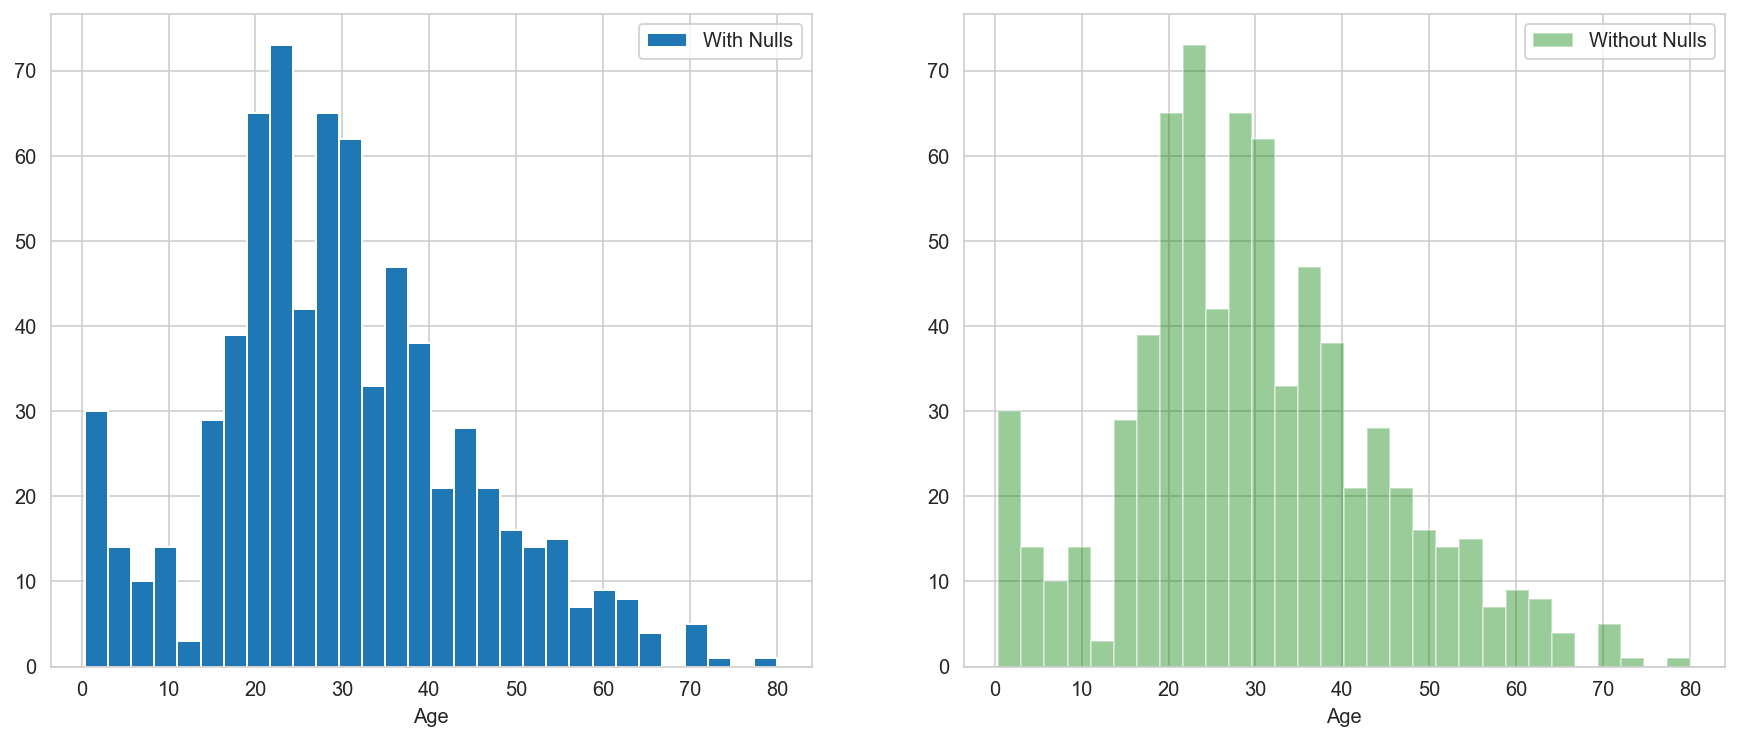

In [11]:
# code here please
fig, ax  = plt.subplots(nrows = 1 , ncols=2 ,figsize=(15,6))
without_null_titanic = titanic.copy()
without_null_titanic.dropna(subset = ["Age"], inplace=True)
ax[0].hist(titanic['Age'],stacked=False ,label='With Nulls',bins=30);
ax[0].legend();
ax[0].set_xlabel('Age');
ax[1].hist(without_null_titanic['Age'],color='green',alpha = 0.4, label='Without Nulls',bins=30);
ax[1].legend();
ax[1].set_xlabel('Age');

#There is no difference between them

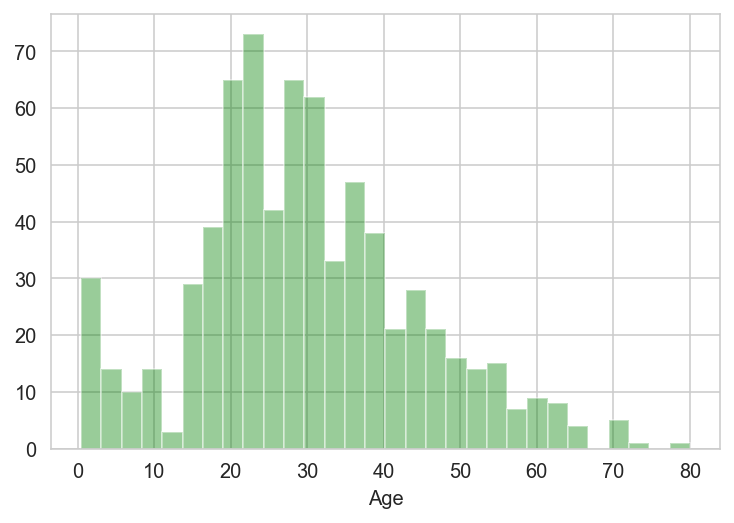

In [14]:
# NO CODE HERE PLEASE

**Recreate the boxplot below, is there any relation between Pclass (passenger class) and age?**

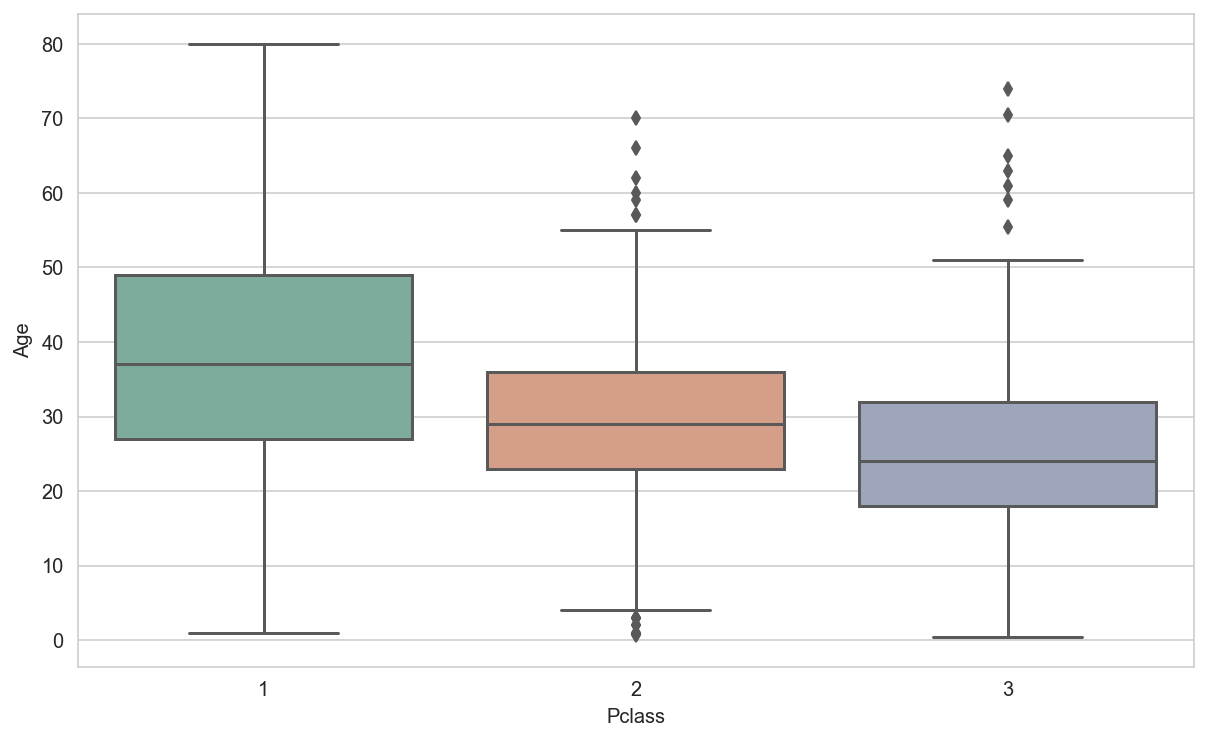

In [12]:
# code here please
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age', data=titanic,
                fliersize=5, linewidth=1.5,
                saturation=0.5,
           palette='Set2');

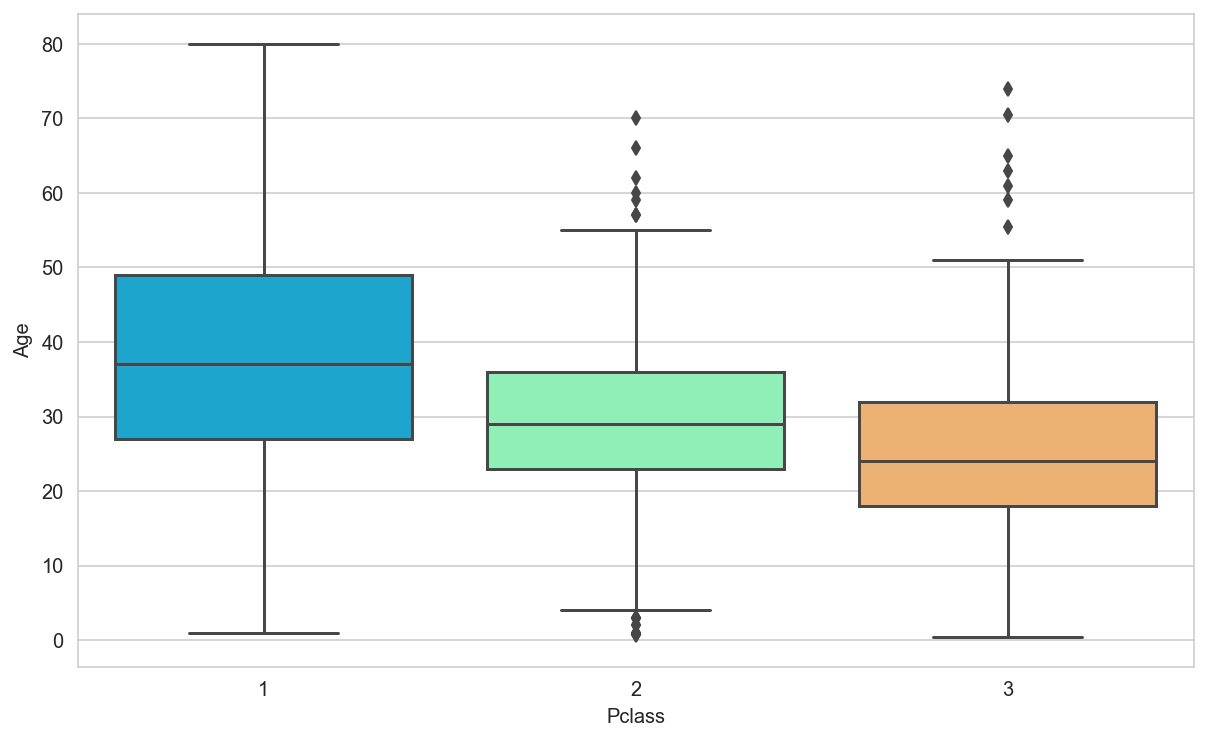

In [16]:
# NO CODE HERE PLEASE

**Create the plot below, what is the type of this plot?**

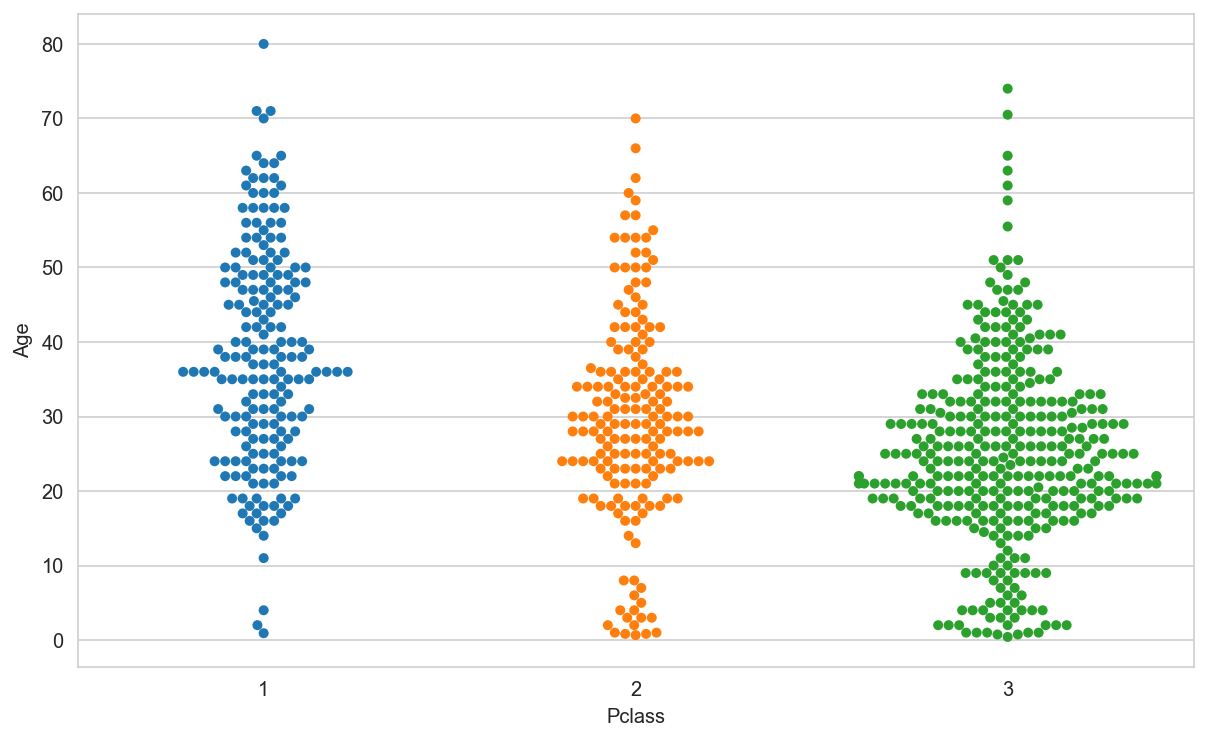

In [13]:
# code here please
fig,ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x='Pclass',y='Age',data = titanic);
#swarmplot

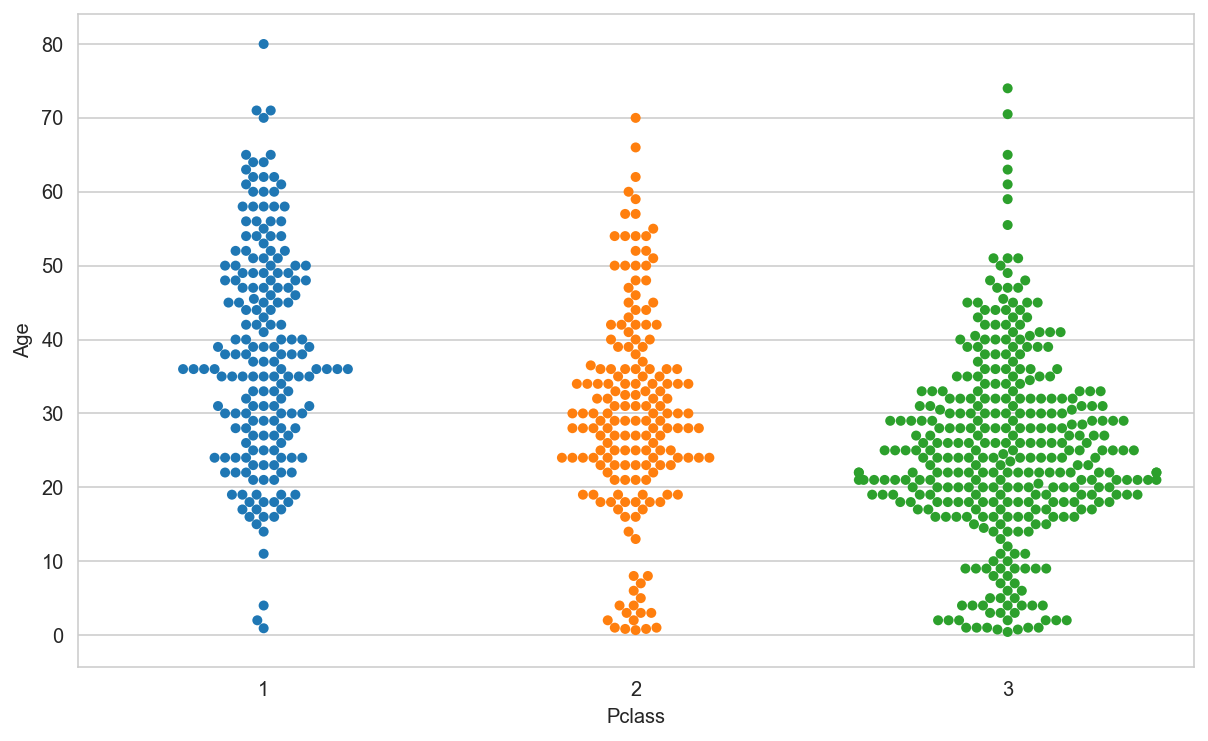

In [18]:
# NO CODE HERE PLEASE

Try to create more plots, something you think is the best plot for data visualizations. See the lecture note book for range of plotting options. 

**What are the linear correlations between the numeric variable? How would you visualize them?**

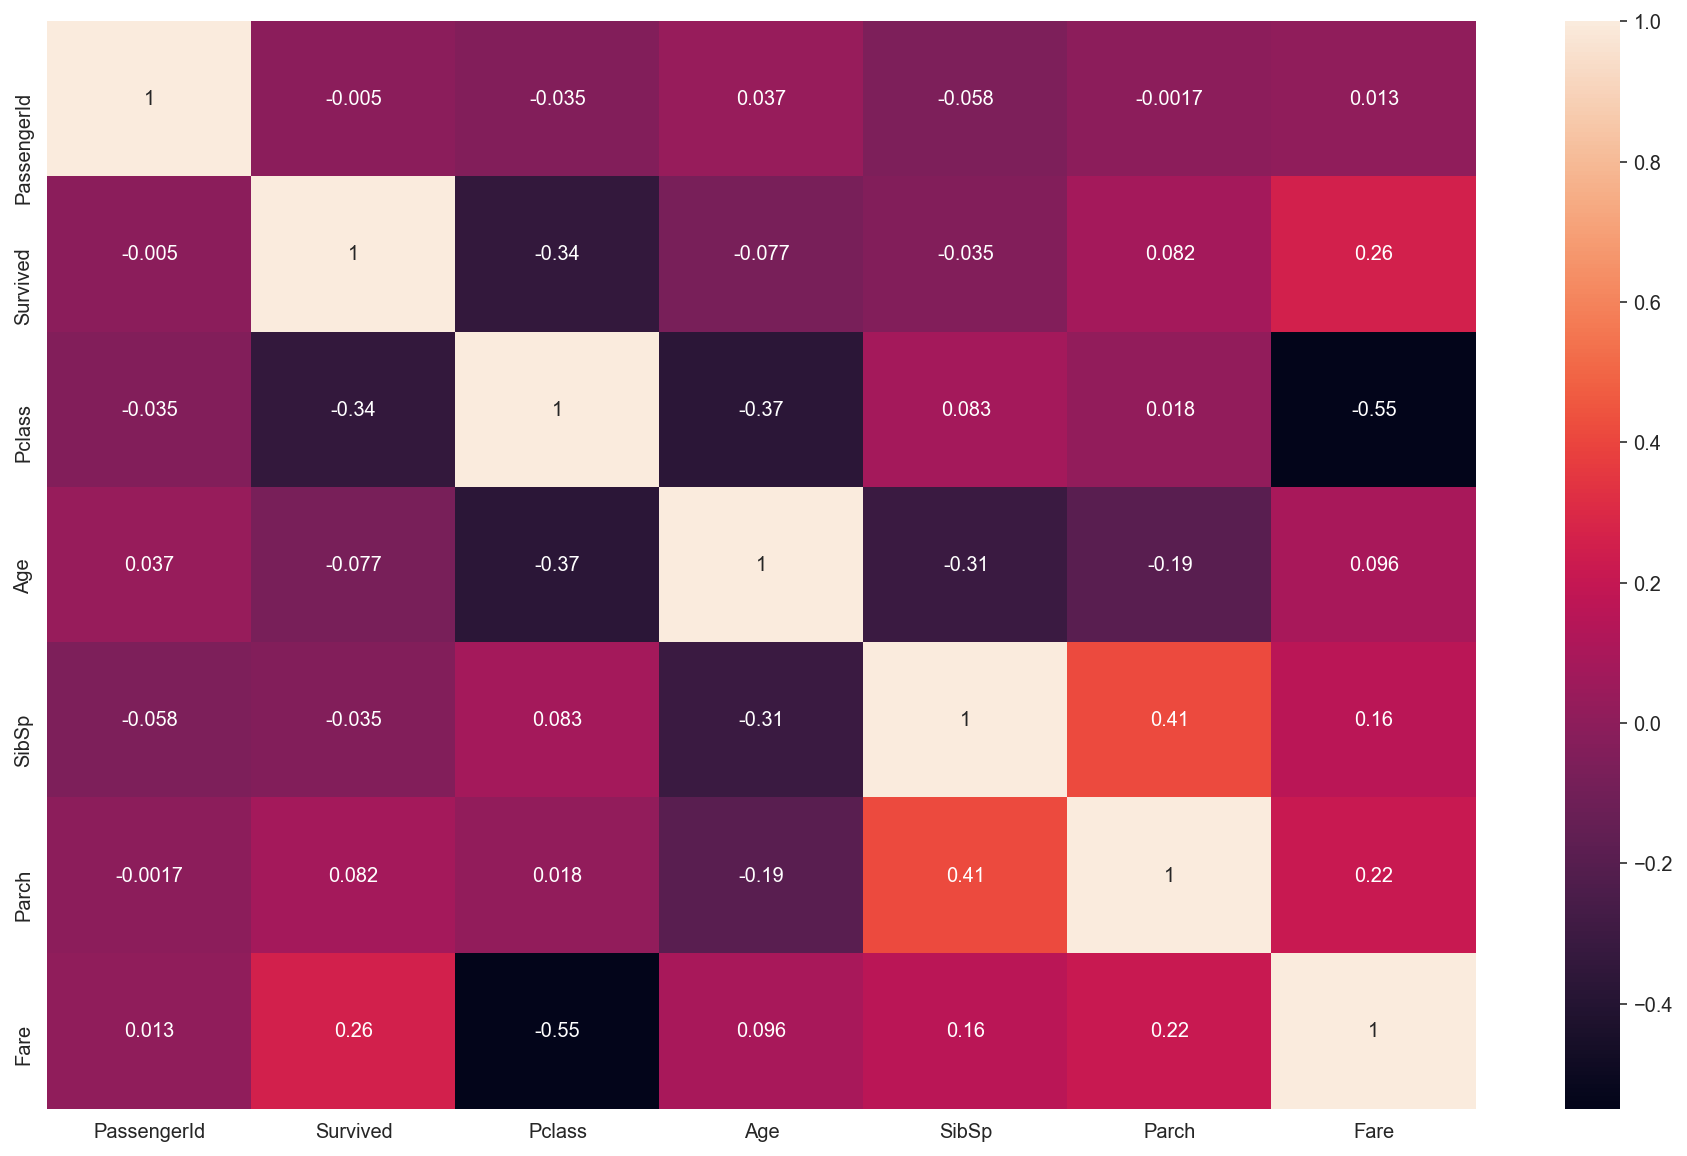

In [14]:
# code here please
plt.figure(figsize=(16,10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()
#we have used a heatmap to visualize the linear correlations

In [ ]:
# As heatmap has shown, the Pclass has fair negative correlation with fare